In [1]:
%matplotlib inline
import os, sys, inspect, io, pickle
import matplotlib.pyplot as plt
from math import floor
import keypoint_helpers
import state_helpers
from scipy.interpolate import spline
import numpy as np


cmd_folder = os.path.realpath(
    os.path.dirname(
        os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0])))

if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)
    
with open('test.pickle', 'rb') as handle:
    kpts = pickle.load(handle)
    
# from transitions import *
# from transitions.extensions import GraphMachine
# from IPython.display import Image, display, display_png

# class Matter(object):
#     def is_valid(self):
#         return True
    
#     def is_not_valid(self):
#         return False
    
#     def is_also_valid(self):
#         return True
    
#     # graph object is created by the machine
#     def show_graph(self, **kwargs):
#         stream = io.BytesIO()
#         self.get_graph(**kwargs).draw(stream, prog='dot', format='png')
#         display(Image(stream.getvalue()))

In [2]:
kpts_inverted = state_helpers.invert_keypoints(kpts)

In [3]:
%%capture
keypoints = keypoint_helpers.get_keypoint_labels()

fig, axes = plt.subplots(9, 2,figsize=(15,30))
flat_axes = [item for sublist in axes for item in sublist]

for i, ax in enumerate(flat_axes):
    ax.grid()
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    # add 1 to skip second plot
    if i == 0:
         ax.set_title(keypoints[i])
    elif i == 1:
        continue
    else:
        ax.set_title(keypoints[i-1])
        
fig.tight_layout()

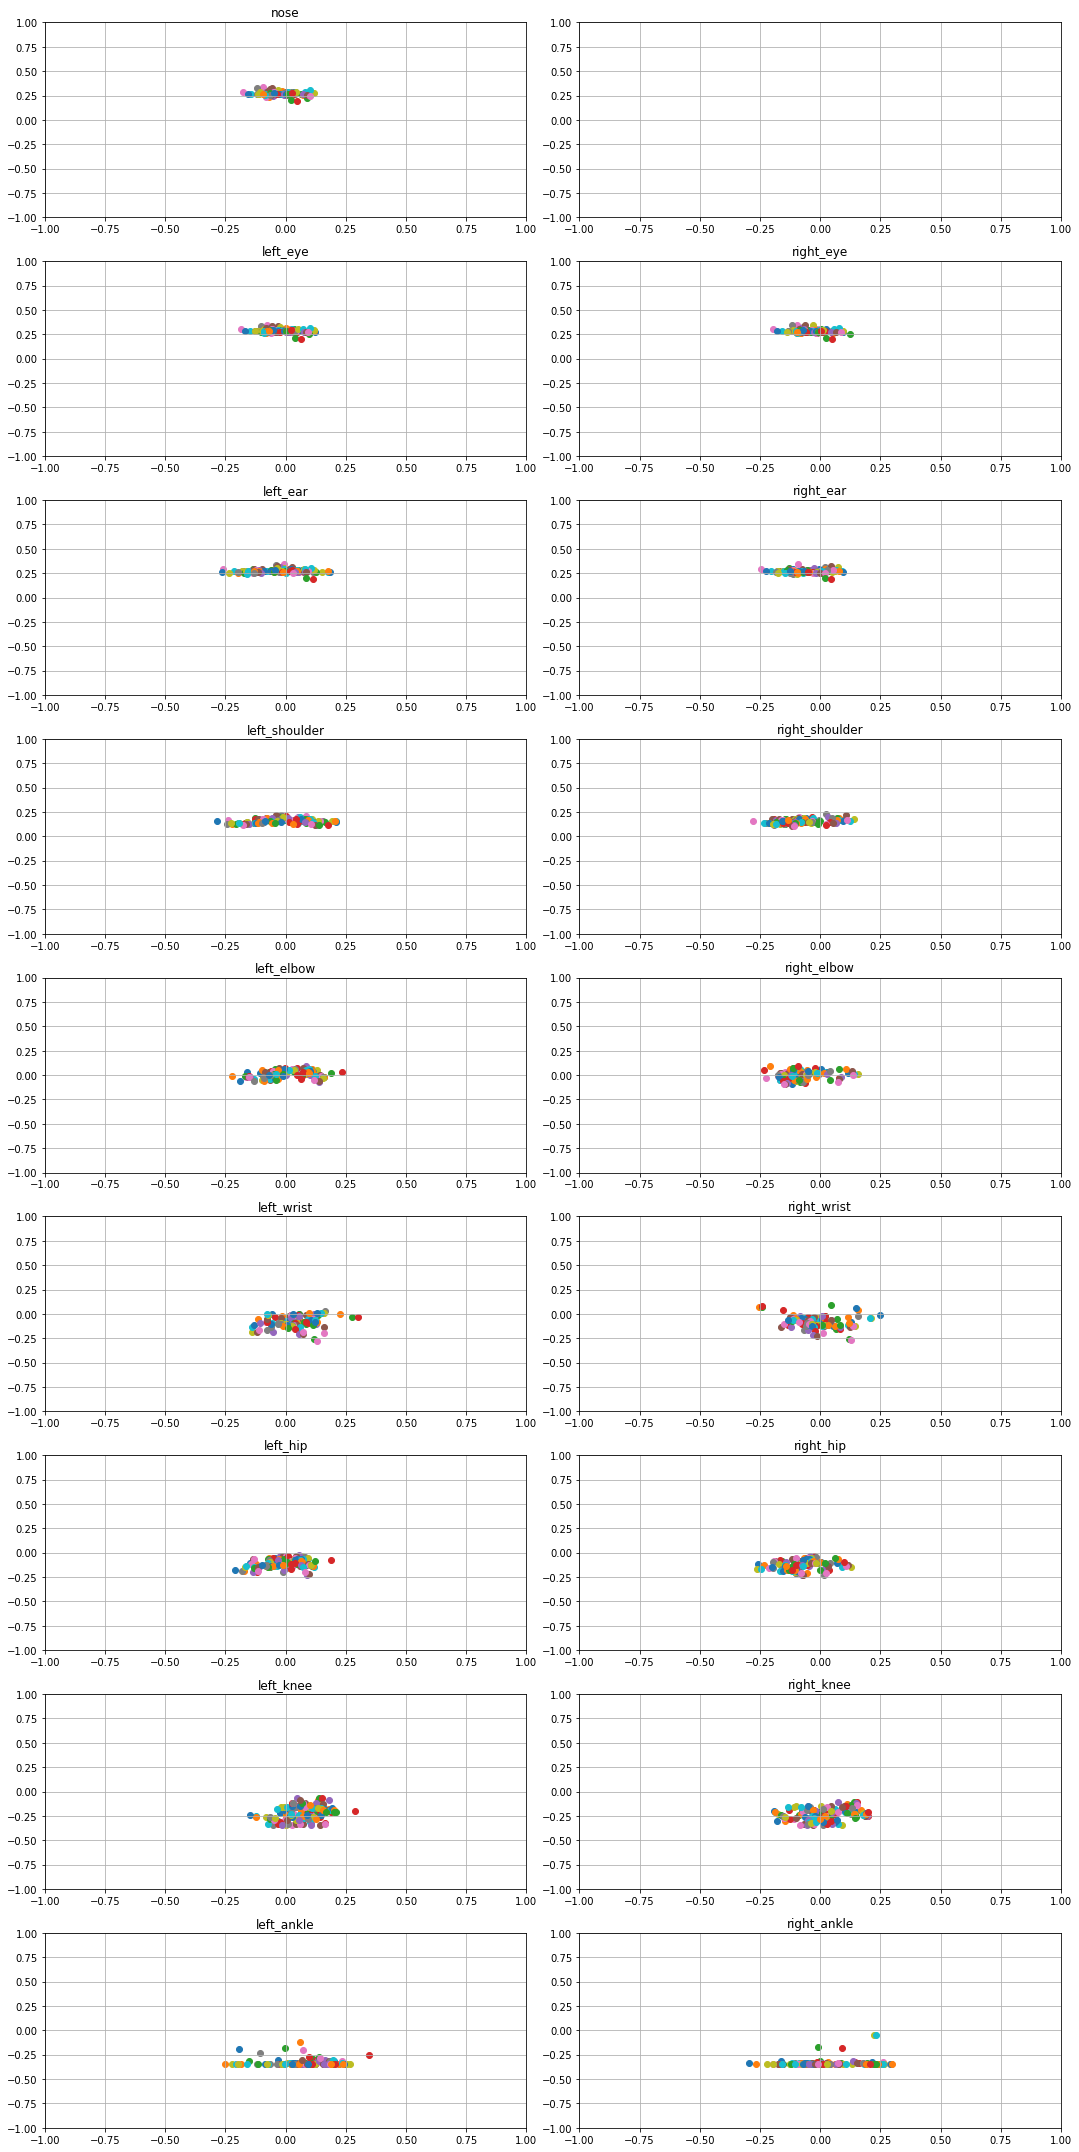

In [4]:
for frame in kpts_inverted:
    for i, point in enumerate(frame):
        # add 1 to skip second plot
        plot_index = i
        if i > 0:
            plot_index+=1
        flat_axes[plot_index].scatter(point[0],point[1])
fig

In [5]:
%%capture

fig, axes = plt.subplots(9, 2,figsize=(15,30))
flat_axes = [item for sublist in axes for item in sublist]

for i, ax in enumerate(flat_axes):
    ax.grid()
    ax.set_ylim(-.6,.6)
    ax.set_xlabel('Frame (time ~.4 sec)')
    ax.set_ylabel('X measure')
    # add 1 to skip second plot
    if i == 0:
         ax.set_title(keypoints[i] + ' X motion')
    elif i == 1:
        continue
    else:
        ax.set_title(keypoints[i-1] + ' X motion')

fig.tight_layout()

In [6]:
import copy

kpt_dict_x = {
    'nose': [],
    'left_eye': [],
    'right_eye': [],
    'left_ear': [],
    'right_ear': [],
    'left_shoulder': [],
    'right_shoulder': [],
    'left_elbow': [],
    'right_elbow': [],
    'left_wrist': [],
    'right_wrist': [],
    'left_hip': [],
    'right_hip': [],
    'left_knee': [],
    'right_knee': [],
    'left_ankle': [],
    'right_ankle': []
}

kpt_dict_y = copy.deepcopy(kpt_dict_x)

time = list(range(len(kpts_inverted)))

for frame in kpts_inverted:
    for i, point in enumerate(frame):
        kpt_dict_x[keypoints[i]].append(point[0])
        kpt_dict_y[keypoints[i]].append(point[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  after removing the cwd from sys.path.


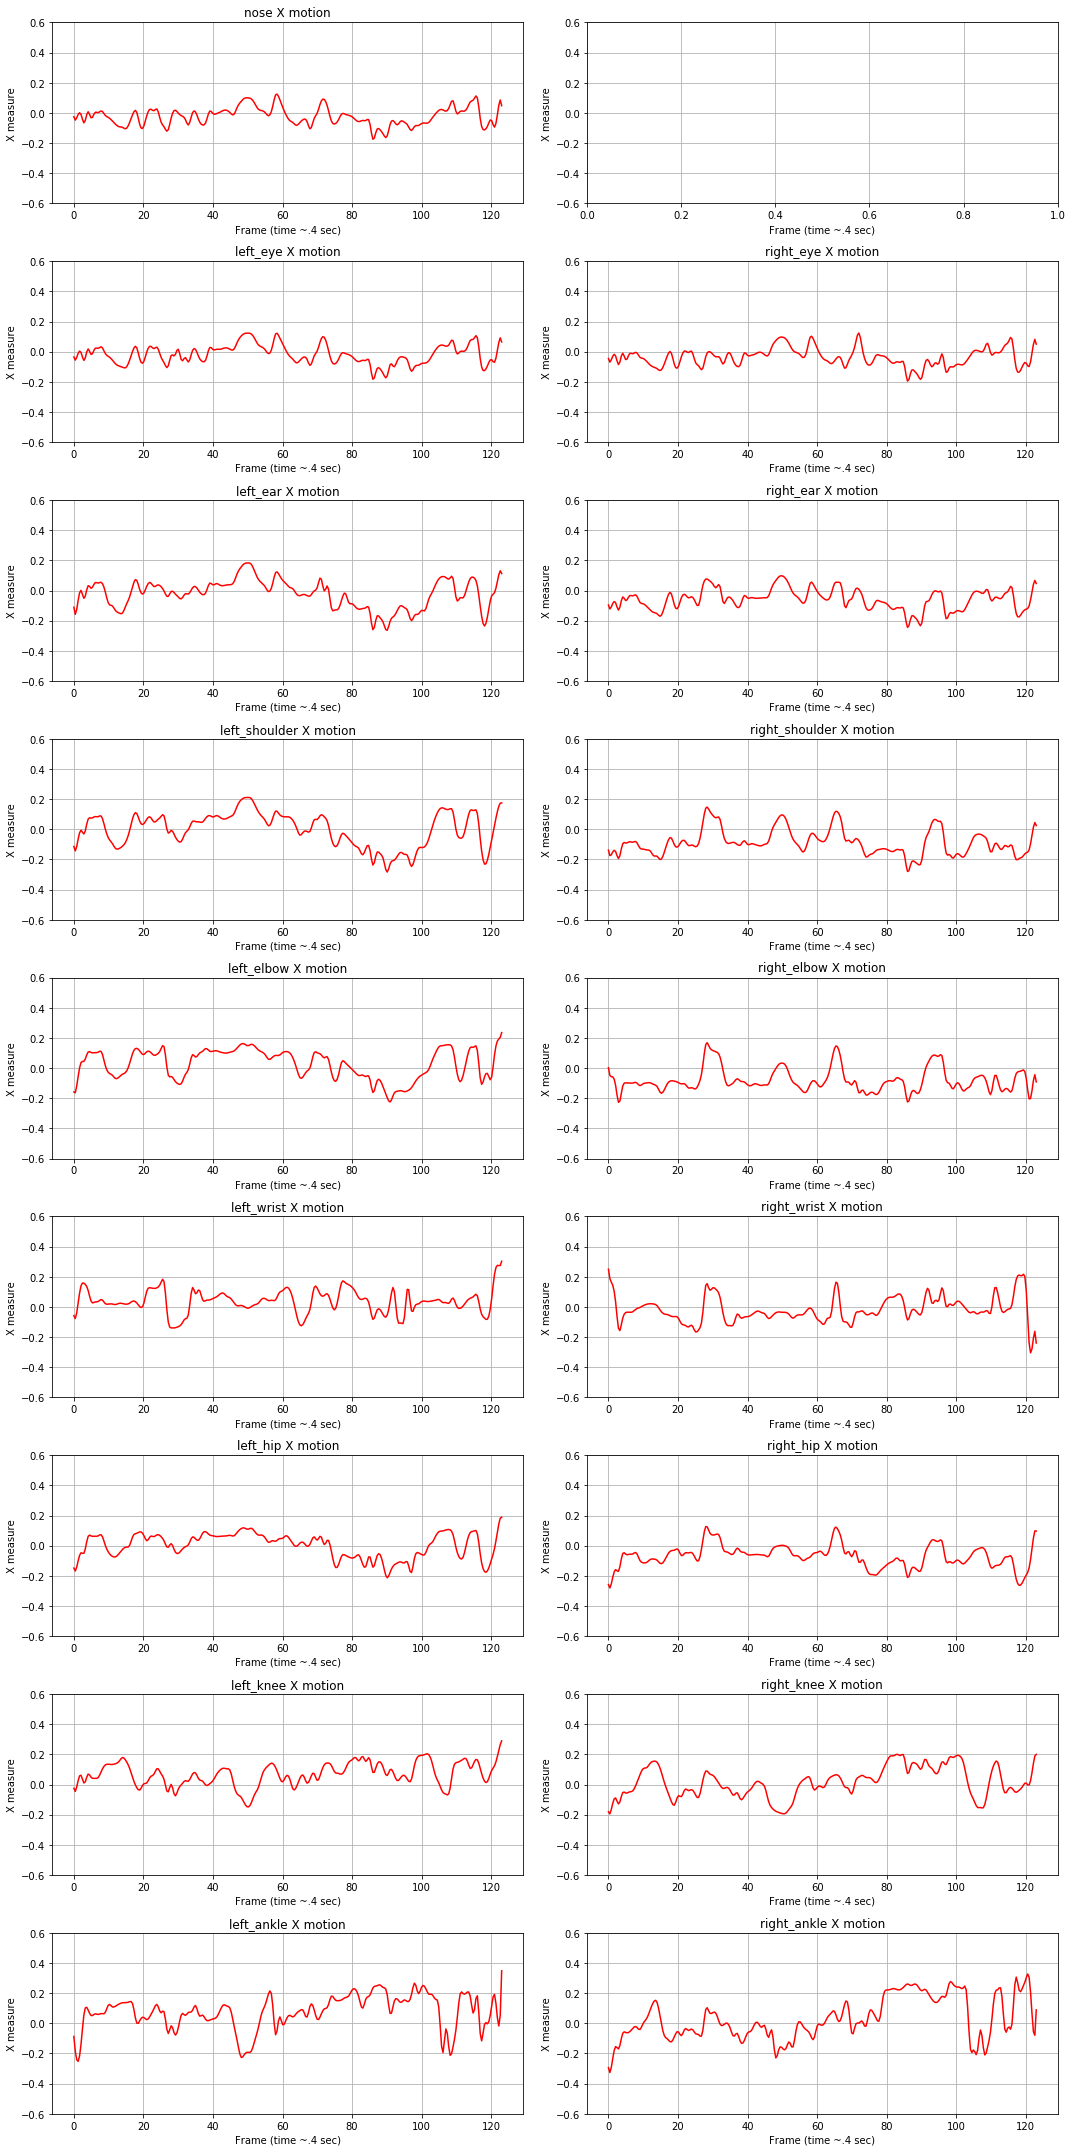

In [7]:
x_smooth = np.linspace(min(time), max(time), 300)

for i, kpt in enumerate(keypoints):
    y_smooth = spline(time, kpt_dict_x[kpt] , x_smooth)
    if i < 1:        
        flat_axes[i].plot(x_smooth, y_smooth,'r-')
    elif i >= 1:
        flat_axes[i+1].plot(x_smooth, y_smooth,'r-')
    
fig

In [8]:
%%capture

fig, axes = plt.subplots(9, 2,figsize=(15,30))
flat_axes = [item for sublist in axes for item in sublist]

for i, ax in enumerate(flat_axes):
    ax.grid()
    ax.set_ylim(-.6,.6)
    ax.set_xlabel('Frame (time ~.4 sec)')
    ax.set_ylabel('X measure')
    # add 1 to skip second plot
    if i == 0:
         ax.set_title(keypoints[i] + ' x/y displacement')
    elif i == 1:
        continue
    else:
        ax.set_title(keypoints[i-1] + ' x/y displacement')

fig.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


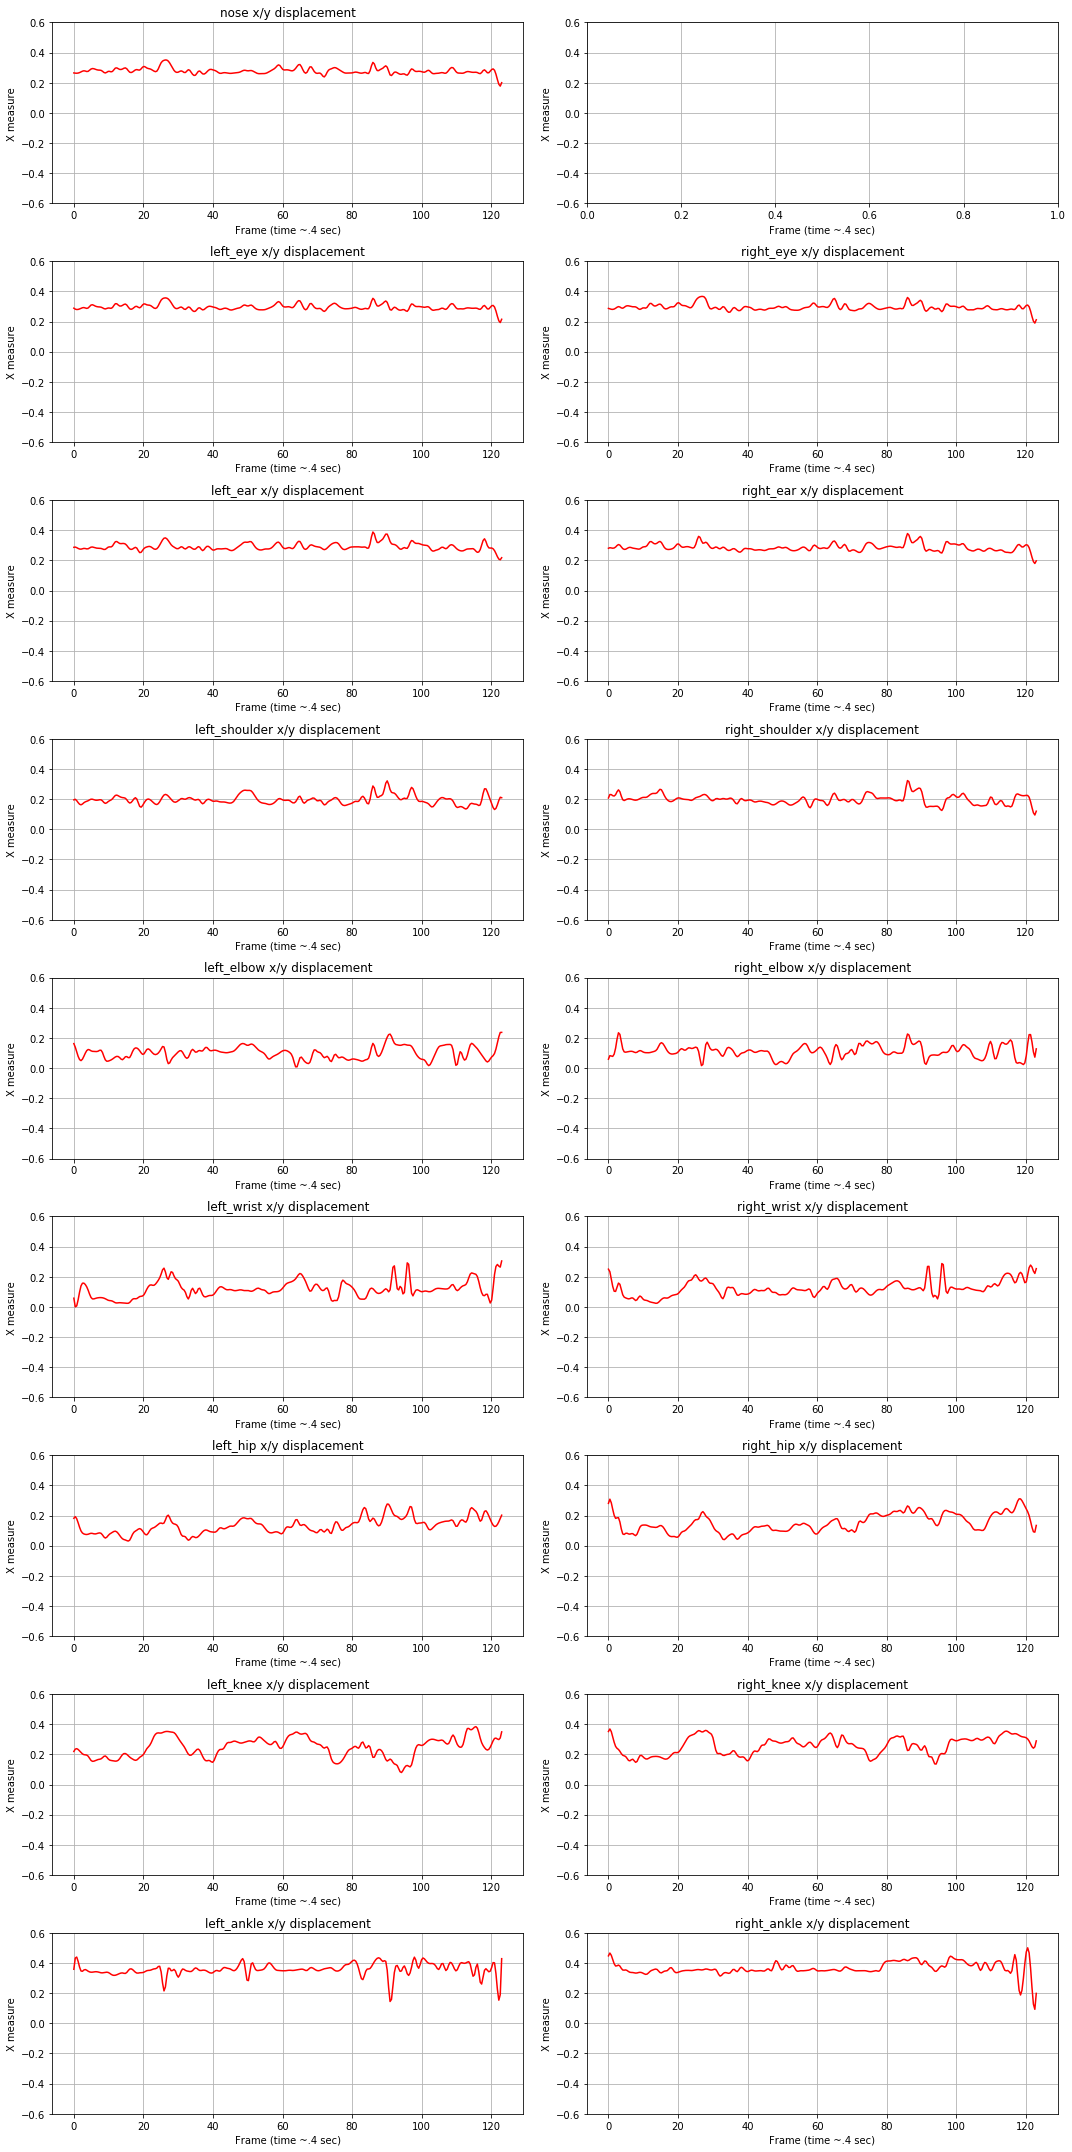

In [9]:
x_smooth = np.linspace(min(time), max(time), 300)
displacement = {}

for i, kpt in enumerate(keypoints):
    xsquared = np.square(np.asarray(kpt_dict_x[kpt]))
    ysquared = np.square(np.asarray(kpt_dict_y[kpt]))
    displacement[kpt] = np.sqrt(xsquared + ysquared)
    y_smooth = spline(time, displacement[kpt], x_smooth)
    if i < 1:
        flat_axes[i].plot(x_smooth, y_smooth,'r-')
    elif i >= 1:
        flat_axes[i+1].plot(x_smooth, y_smooth,'r-')
fig

In [10]:
%%capture

fig, axes = plt.subplots(9, 2,figsize=(15,30))
flat_axes = [item for sublist in axes for item in sublist]

for i, ax in enumerate(flat_axes):
    ax.grid()
    ax.set_ylim(-.6,.6)
    ax.set_xlabel('Frame (time ~.4 sec)')
    ax.set_ylabel('X measure')
    # add 1 to skip second plot
    if i == 0:
         ax.set_title(keypoints[i] + ' X derivative')
    elif i == 1:
        continue
    else:
        ax.set_title(keypoints[i-1] + ' X derivative')

fig.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  after removing the cwd from sys.path.


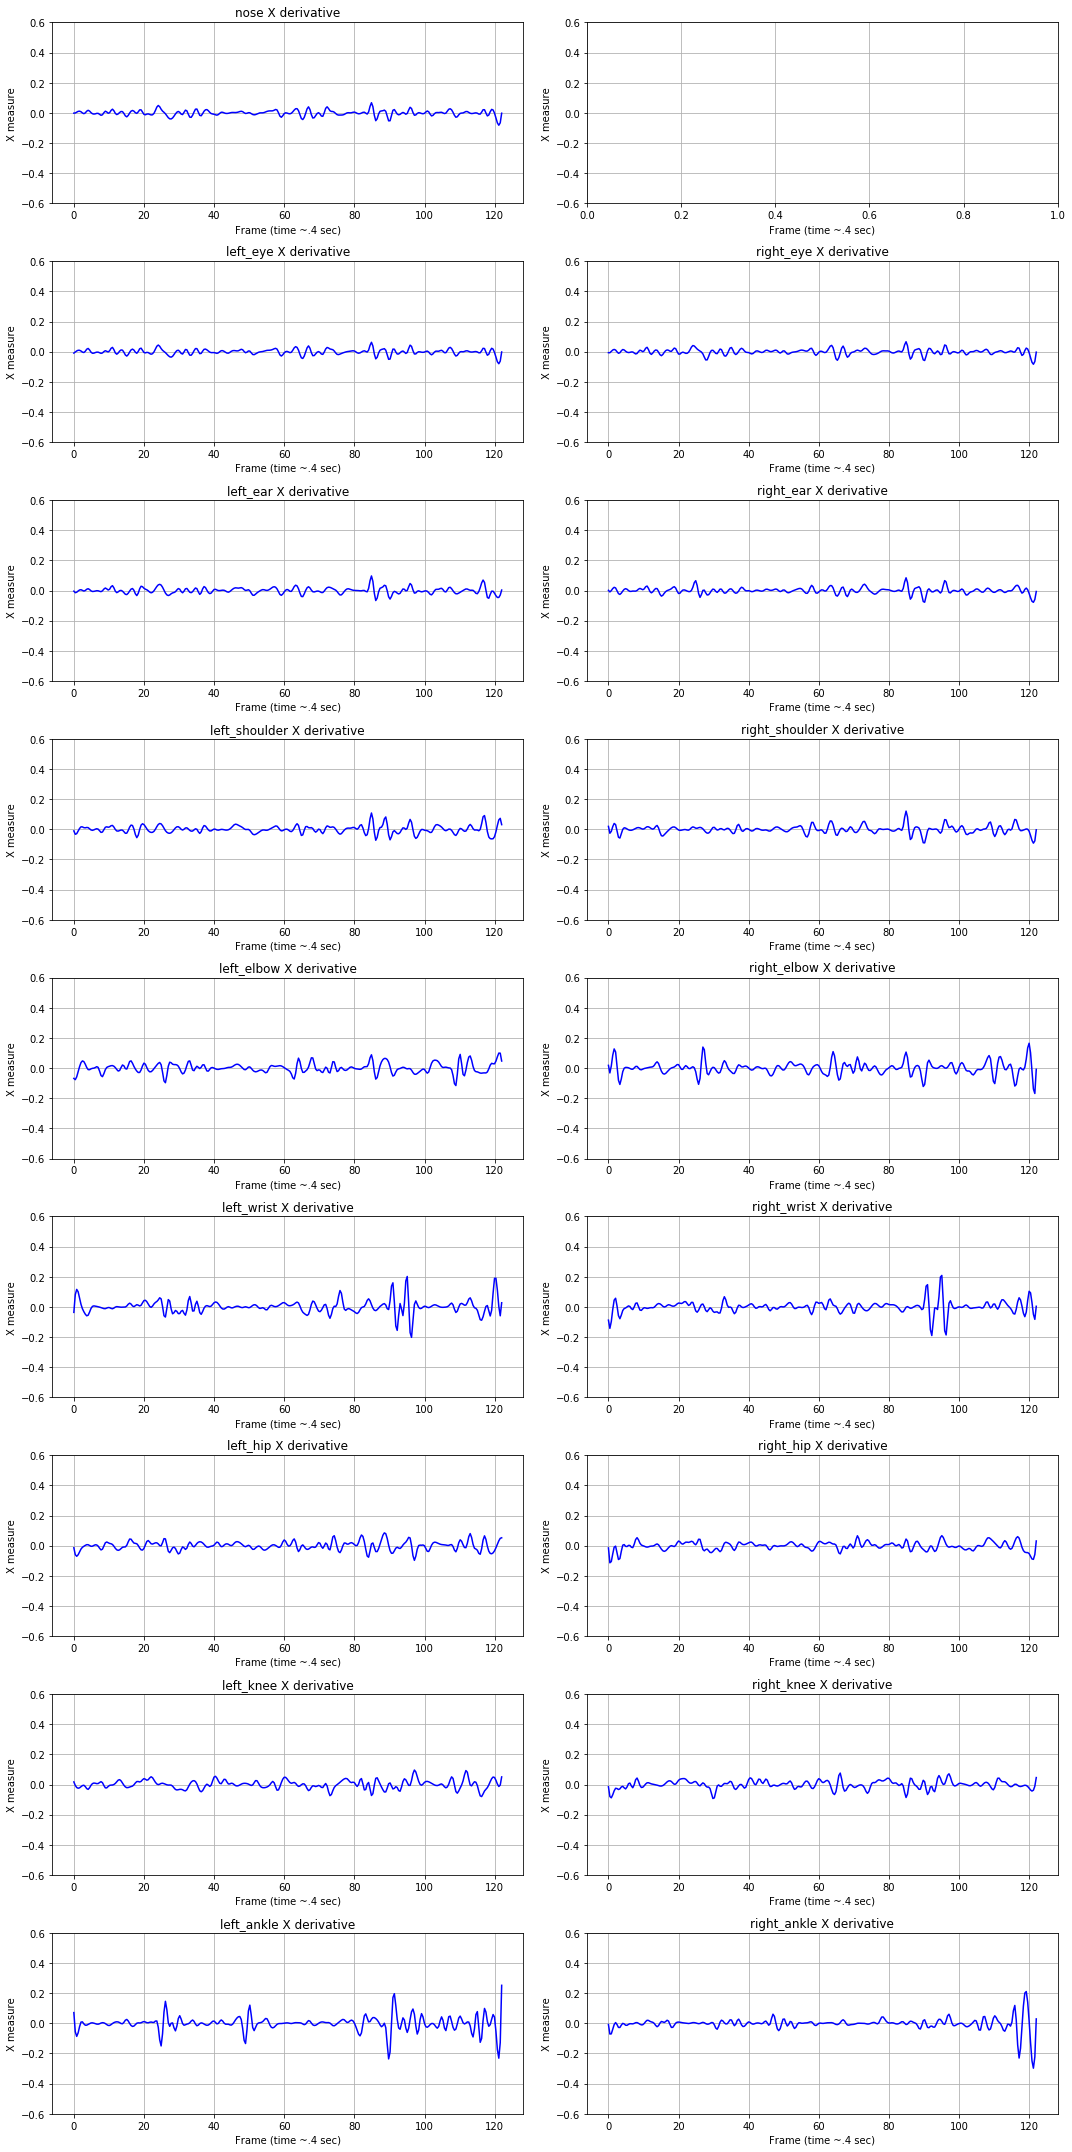

In [11]:
x_smooth = np.linspace(min(time), max(time)-1, 300)
for i, kpt in enumerate(keypoints):
    dXdV = np.diff(displacement[kpt])/np.diff(time)
    y_smooth = spline(time[:-1], dXdV , x_smooth)
    if i < 1:
        flat_axes[i].plot(x_smooth, y_smooth,'b-')
    elif i >= 1:
        flat_axes[i+1].plot(x_smooth, y_smooth,'b-')
    
fig

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


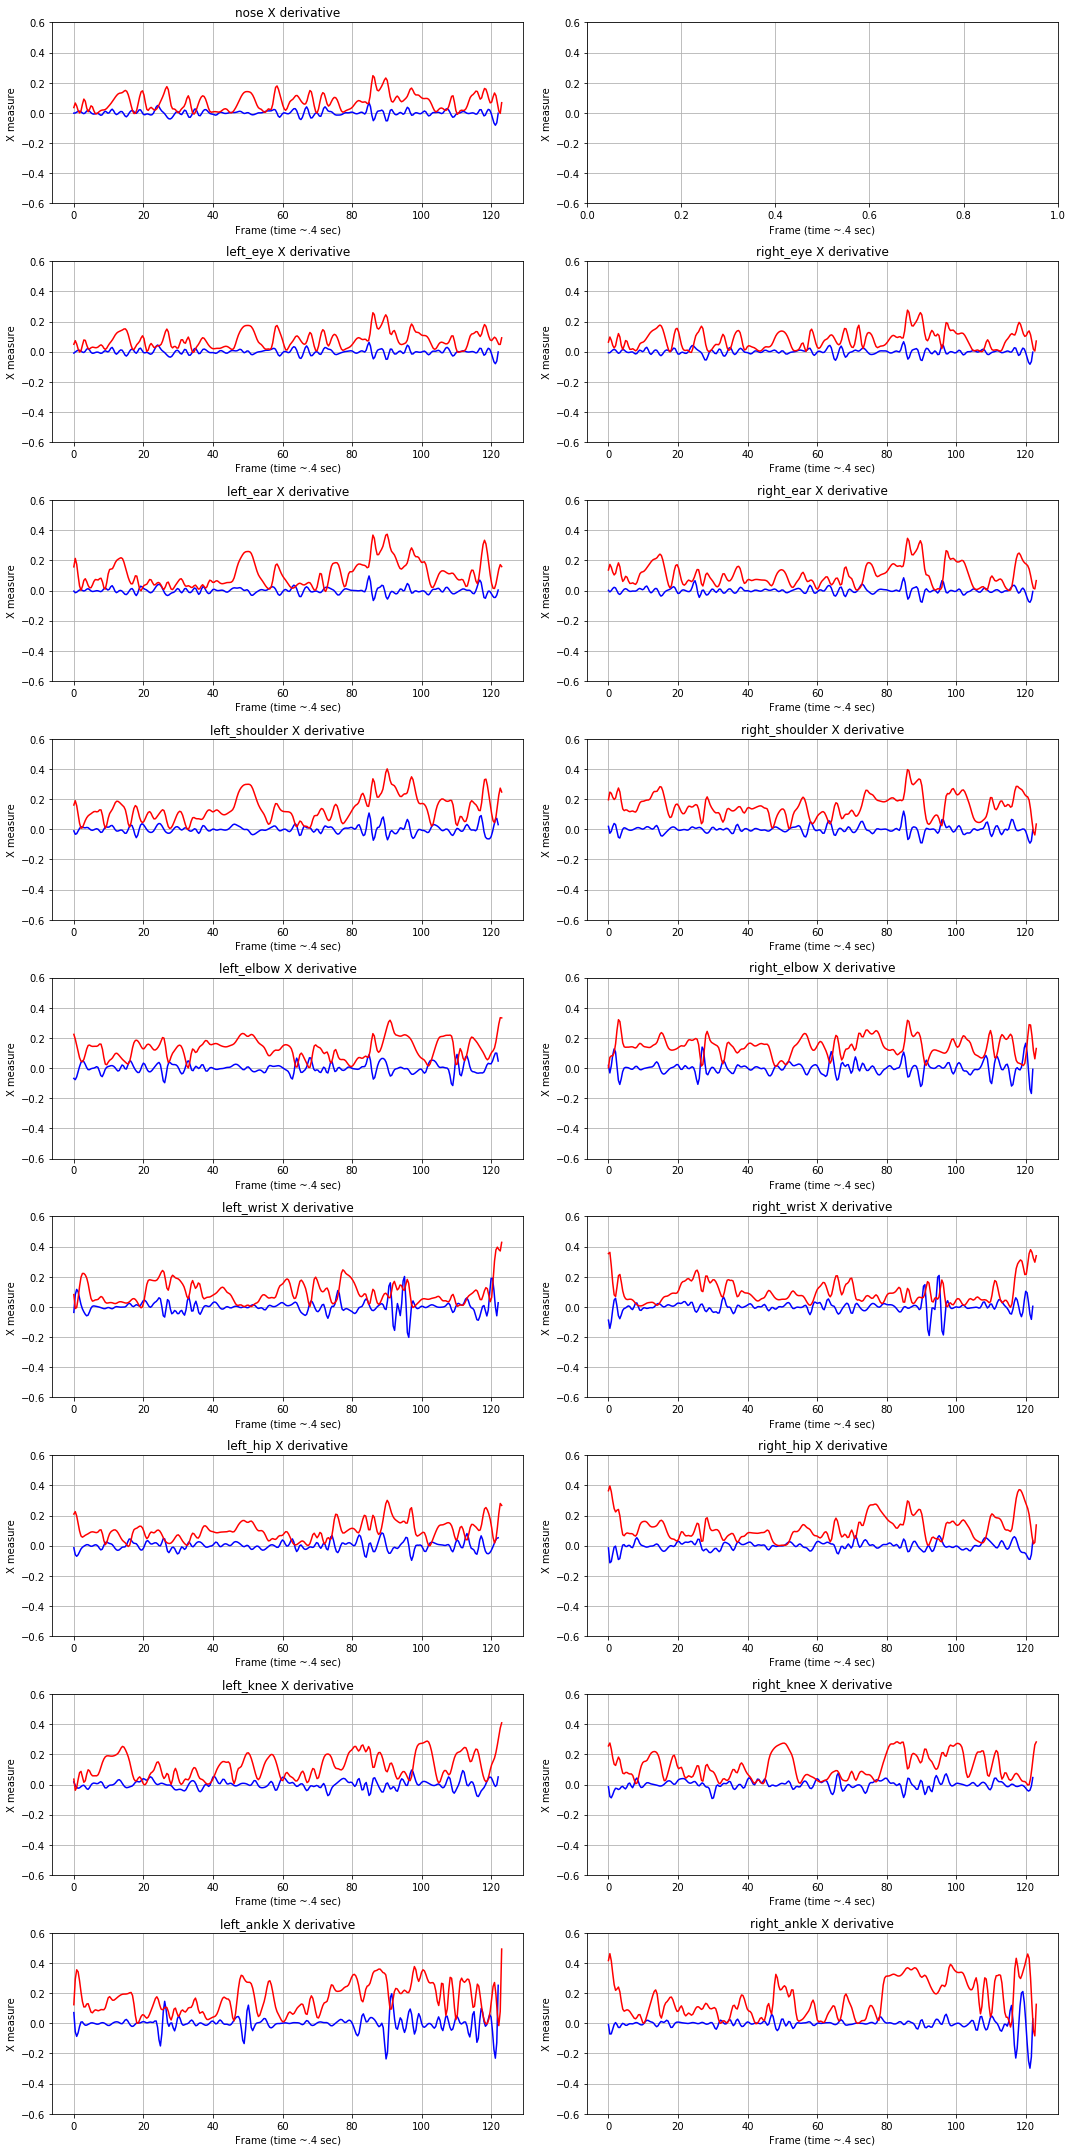

In [12]:
x_smooth = np.linspace(min(time), max(time), 300)
displacement = {}

for i, kpt in enumerate(keypoints):
    xsquared = np.square(np.asarray(kpt_dict_x[kpt]))
    ysquared = np.square(np.asarray(kpt_dict_y[kpt]))
    displacement[kpt] = np.sqrt(xsquared + xsquared)
    y_smooth = spline(time, displacement[kpt], x_smooth)
    if i < 1:
        flat_axes[i].plot(x_smooth, y_smooth,'r-')
    elif i >= 1:
        flat_axes[i+1].plot(x_smooth, y_smooth,'r-')
fig